# Machine Learning Basics

In this tutorial, we will introduce basic concepts in machine learning related to pattern recognition. We will go over the basic machine learning process, discuss the differences between supervised and unsupervised learning algorithms, and go through some basic algorithms and examples.

## Machine learning process

Machine learning problems typically involve multiple steps. A high level overview of the steps is as follows:

- **Data collection**: The quantity and quality of data that we obtain will strongly impact how well our predictive model will perform. Data can either be obtain by using pre-collected databases or via your own collection methods.
- **Data pre-processing**: This step involves things such as formatting our data to a common size, centering images, rejecting poor quality images, removing duplicates, etc. to ensure a high quality data set.
- **Feature extraction**: We want to identify which attributes of the data (i.e. 'features') are relevant to our goal. After we've defined our features, we want to collect these measurements into a data representation (such as a vector) that we can work with into our algorithm.
- **Obtain training and test sets**: We want to split our data into a training set, used to to train our model, and a test set, used to evaluate our trained model's performance.
- **Model selection**: We want to select an appropriate model to solve our problem. To do so, we need to understand what type of problem we are solving (discussed in the following section). We also want to choose the appropriate *hyperparameters* for the model we use.
- **Model application**: Here, we apply our model to our training data. This is typically where the bulk of the work lies. Finally, once we've trained our model, we evaluate our model on our test data to determine how well it performs against unseen data. 


## Supervised vs. unsupervised learning

### Supervised learning

In supervised learning, we are given a training set of data samples and the labels for each sample. Our goal is to learn the function that maps the a sample to its correct label. Supervised learning problems include:
- Regression: The label is a continuous value.
- Classification: The label is a discrete value (i.e. catagorical).

In mathematical terms, supervised learning problems are of the following form: Given a set of $n$ training examples $\{ (x_1, y_1), \dots, (x_n, y_n) \}$, where $x_i$ is the feature vector for the $i$th example and $y_i$ is its label, we want to find a function $f$ that correctly maps $x_i$ to $y_i$.

We can think about this using an optimization persepective.


### Unsupervised learning

In unsupervised learning, we are given a data set of samples *without* labels, where the goal is to discover patterns within the data set. Unsupervised learning problems include:
- Clustering: Discovering groups of similar examples.
- Anomaly detection: Identifying unsual samples within the data set.
- Dimensionality reduction: Projecting the data from a high-dimensional space to a lower-dimensional space.

In [27]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Binary classification using SVMs

We can start with a basic binary classification example. In this example, we want to classify fruit into lemons or oranges using features such as the fruit's width and color. Since we are using a pre-collected dataset, data pre-processing and feature extraction has already been done.

In [69]:
# Load fruit dataset
df = pd.read_table('fruit_binary.txt')
df.head()

,label,fruit,width,color_score
0,-1,lemon,7.1,0.69
1,-1,lemon,6.8,0.71
2,1,orange,9.0,0.75
3,1,orange,9.2,0.75
4,1,orange,9.6,0.74


We can plot this data as follows:

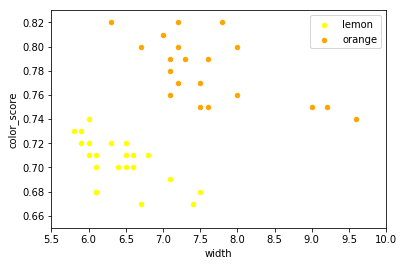

In [29]:
fig, ax = plt.subplots()
ax.set_xlim([5.5,10])
ax.set_ylim([0.65,0.83])
colors = {'lemon':'yellow', 'orange':'orange'}
grouped = df.groupby('fruit')
for key, group in grouped:
    group.plot(ax = ax, kind='scatter', x = 'width', y = 'color_score', label = key, color = colors[key])

We can see that oranges typically have a higher color score and a higher mass than lemons. Moreover, the data is **linearly sepearable**, meaning there exists at least one line on the plane where all points in one class fall on one side of the line while all points in the other class fall on the other side. 

We can classify the fruits by finding a line (called the **decision boundary**) that splits the space such that all oranges fall on one side of the line while all lemons fall on the other side. However, a problem is that there are multiple lines that can separate these points, so how do we decide which is the *best* decision boundary? We can do so using **support vector machines (SVMs)**.

The idea behind SVMs is that we can draw a margin around the decision boundary, such that the edge of the margin touches the closest point in the data set on either side. The best decision boundary will be the one with the largest margin.

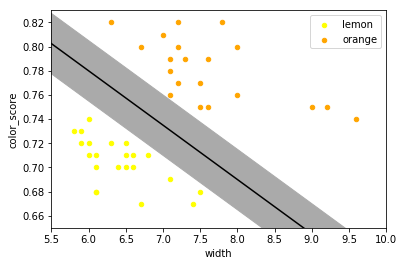

In [30]:
fig, ax = plt.subplots()
ax.set_xlim([5.5,10])
ax.set_ylim([0.65,0.83])
colors = {'lemon':'yellow', 'orange':'orange'}
grouped = df.groupby('fruit')
for key, group in grouped:
    group.plot(ax = ax, kind='scatter', x = 'width', y = 'color_score', label = key, color = colors[key])

xfit = np.linspace(5.5, 10)
yfit = -0.045* xfit + 1.05
plt.plot(xfit, yfit, '-k')
plt.fill_between(xfit, yfit - 0.025, yfit + 0.025, edgecolor='none',color='#AAAAAA')

### Optimization perspective on SVM

As previous stated, the goal of an SVM is to select the decision boundary with the largest margin. We can think about this as finding two parallel lines such that (1) everything on the left side of the left line is classified as lemons and everything on the right side of the right line is classified as oranges and (2) the distance between the lines is maximized. 

Mathematically, we can describe these lines using weight parameters $w_1, w_2, b$. We want to find $w_1, w_2, b$ such that:
1. When $w_1 x_1 + w_2 x_2 + b \leq 0$, the point $x$ will be classified as $-1$ (i.e. as a lemon), and when $w_1 x_1 + w_2 x_2 + b \geq 0$, the point $x$ will be classified as $+1$ (i.e. as an orange). The line $w_1 x_1 + w_2 x_2 + b = 0$ is our decision boundary.

2. We want the size of the margin to be as large as possible. Geometrically, the size of the margin is equal to $\frac{2}{\sqrt{w_1^2 + w_2^2}}$, so we want to find $w_1$ and $w_2$ such that $\frac{2}{\sqrt{w_1^2 + w_2^2}}$ is maximized. This is equivalent to minimizing $\sqrt{w_1^2 + w_2^2}$ or $w_1^2 + w_2^2$.

Therefore, in terms of an optimization problem, the SVM can be written as follows:

$$\min_{w_1, w_2} w_1^2 + w_2^2 \quad \text{s.t.} \quad \begin{align} w_1 x_1 + w_2 x_2 + b \leq -1 \text{ if } x_i = -1 \\ w_1 x_1 + w_2 x_2 + b \geq +1 \text{ if } x_i = +1 \end{align}.$$

### Fitting an SVM

Instead of solving this optimization problem ourselves, we can we can use `SVC` from Scikit-Learn. `SVC` has many hyperparameters

```python
SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='auto_deprecated',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=None,
)
```
For now, we will leave most of the hyperparameters on the default setting except `kernel = 'linear'` and `C = 1E10`. Later, we will discuss what these settings mean.

Now, lets split our dataset into a test set and a training set. We will fit our model using the training set and then evaluate our model using the test set.

In [72]:
# Import SVM model for classification from sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Separate data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df[['width','color_score']], df['fruit'], random_state=0)
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Fit the model
model = SVC(kernel='linear', C=1E10)
model.fit(X_train, y_train)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now that we've fit our model, we can plot the decision boundary as well as the margin boundaries.

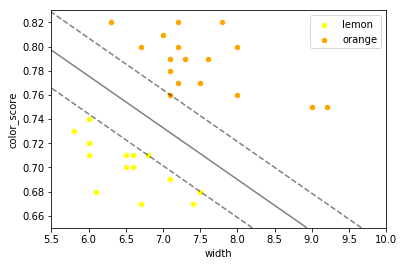

In [75]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
        
# Plot decision boundary and margins
fig, ax = plt.subplots()
ax.set_xlim([5.5,10])
ax.set_ylim([0.65,0.83])
colors = {'lemon':'yellow', 'orange':'orange'}
grouped = df_train.groupby('fruit')
for key, group in grouped:
    group.plot(ax = ax, kind='scatter', x = 'width', y = 'color_score', label = key, color = colors[key])
plot_svc_decision_function(model, ax);


We can notice that there are a few points that touch the margin. These are called the **support vectors**. The support vectors are critical to determining the model's fit and changing them will change the model's fit. Correctly classified points further away from the margin will not change the model's fit.

The reason why this holds is that if the support vectors were moved such that they are further away from the decision boundary, the margin would be able to be wider while still satisfying the constraint that the training points are on the correct sides of the margin.

We can find the support vectors, which are stored in the `support_vectors_` attribute of the model.

In [80]:
model.support_vectors_

array([[7.5 , 0.68],
       [6.8 , 0.71],
       [7.1 , 0.76]])

The fitted model can be used to predict new values using the `predict` method. For example, say we have a new point with width 8.1 and color score 0.79.

In [81]:
model.predict([[8.1,0.79]])

array(['orange'], dtype=object)

We can use the `score` method on our test set to obtain how accurate our fitted model is on the unseen data in the test set.

In [82]:
model.score(X_test, y_test)

1.0

### Soft margin SVM and hinge loss

We can extend the previously presented ideas to data that is not linearly separable. This is called the **soft-margin SVM** (in contrast to previous **hard-margin SVM**).

Here, we do not enforce the constraints that all lemon points must lie on the left side of the left margin and all orange points must lie on the right side of the right margin. Instead, we use the **hinge loss**:
$$\max \{0 , 1 - y_i(w_1 x_1 + w_2 x_2 + b) \}.$$

In words, this function is 0 when a point is on the correct side of the margin and 1 when the point is on the wrong side of the margin. The lower the hinge loss is, the more points are correctly classified. Now, our goal is to minimize *both* the $w_1^2 + w_2^2$ term (similar to last time, which equals to maximizing the margin) and the hinge loss. Note that these goals contradict one another: the larger the margin is, the more points will be on the wrong side. To account for this, we have a hyperparameter parameter $\lambda$ that controls which goal to prioritize.

Mathematically, our new optimization problem is:
$$ \min_{w_1, w_2} \max \{0 , 1 - y_i(w_1 x_1 + w_2 x_2 + b) \} + \lambda(w_1^2 + w_2^2),$$
where $\lambda$ controls the trade-off between increasing the margin size and ensuring that all points lie on the right side. For a small $\lambda$, the second term becomes comparatively less important. In this case, the model will behave more like a hard margin SVM since the optimization goal will be to make sure points are on the correct sides of the margin. In `SVC`, this $\lambda$ parameter is denoted as `C`.

Consider the (modified) fruit data set below. We can implement an SVM using different values for `C` and see how the margin changes. We should see that as we increase `C`, the margin shrinks.

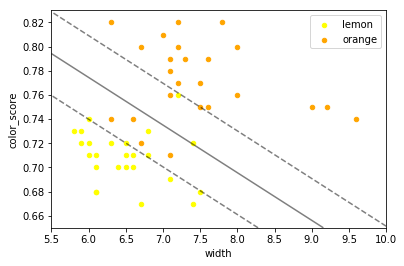

In [142]:
from sklearn.svm import SVC

# Load fruit dataset
df_2 = pd.read_table('fruit_binary_2.txt')

# Plot fruits
fig, ax = plt.subplots()
ax.set_xlim([5.5,10])
ax.set_ylim([0.65,0.83])
colors = {'lemon':'yellow', 'orange':'orange'}
grouped = df_2.groupby('fruit')
for key, group in grouped:
    group.plot(ax = ax, kind='scatter', x = 'width', y = 'color_score', label = key, color = colors[key])

X_train = df_2[['width', 'color_score']]
y_train = df_2['label']

# Fit SVM
model = SVC(kernel='linear', C=1E3) # Change C values
model.fit(X_train, y_train)

# Plot fit
plot_svc_decision_function(model, ax);

### Non-linear decision boundaries and kernelized SVM

Linear decision boundaries may not be able to capture all data sets. For example, consider the dataset below.

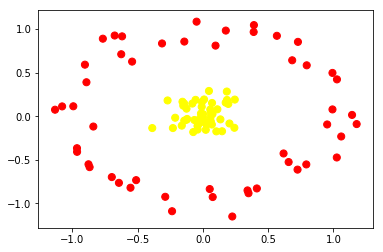

In [145]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

We can see that a better decision boundary between the two classes would be a circle. To handle such data, we can use **kernels**. The idea behind kernels is that we can lift the data into a higher dimensional space, where we can then fit a linear classifier.

For this example, we can use a radial basis function (`kernel = 'rbf'`) to lift the data into three dimensions, where the output of the radial basis function will be our third dimension. First, we can plot this transformed data in 3-d below to visualize the transformation.

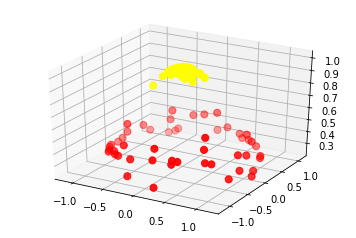

In [146]:
from mpl_toolkits import mplot3d

# Define radial basis function
r = np.exp(-(X ** 2).sum(1))

# Plot 3-d plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn');

We see that a linear decision boundary (a plane in 3-d) will be able to separate the two classes.

To implement this, we set `kernel = 'rbf'`. Plotting the result in 2-d, we see that we've obtained a non-linear decision.

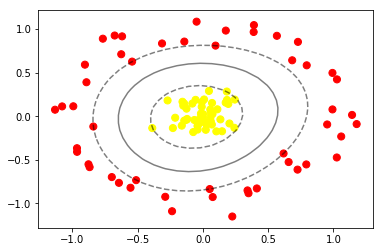

In [147]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Clustering using k-mean clustering algorithm

Now, we will switch gears and talk about an example of an unsupervised learning problem. The aim of clustering is to find patterns in points such that we can group together similar points and assign points that are different to different groups. We will specifically look at the k-means clustering algorithm and use the `KMeans` model. Note that the `sklearn.cluster` module has many other different clustering models.

The steps for the k-means algorithm are as follows:
- Randomly initialize $k$ cluster centers: $\mu_1, \dots, \mu_k$.
- Assign a point $x_i$ to the cluster with the closest center.
- Update cluster centers by averaging all points of the new cluster.
- Repeat this process until converged (i.e. when the cluster centers stop changing).

Drawbacks:
- There is no guarantee whether the cluster produced are the best clusters because the resulting clusters depend a lot on initialization. The `KMeans` method includes multiple methods for initialization. Moreover, `KMeans` runs the clustering algorithm multiple times with different initalizations and chooses the best output.
- We need to input the number of clusters we want (which may not be obvious in some datasets).

We can go through an example of clustering using the k-means algorithm. First, let's generate some data using `make_blobs`, which is one of the data generation libraries from Scikit-Learn. Once again, we split the data into a training and a test set.

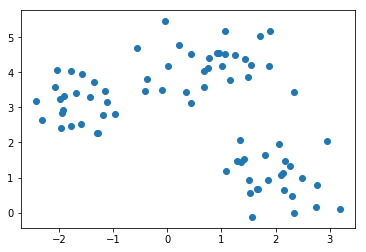

In [126]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=75, centers=3, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1]);

Now, we can fit the k-means model using `KMeans`, which has the following hyperparameter defaults:

```python
KMeans(
    n_clusters=8,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
)
```
From the plot of the data, we can see that there are three blobs, so we can set `n_cluster = 3`. You can change the initialization method to `init ='random'` and change the number of iterations `n_init=1` to see how the clusters are sensitive to different initializations.

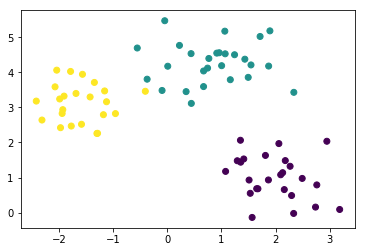

In [140]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init='k-means++', n_init=10)
model.fit(X)
y_pred = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred);

We can also look at the cluster center, which are stored under the attributed `cluster_centers_`. We can plot them in red.

[[ 1.9907126   1.00439836]
 [ 0.85008038  4.26823202]
 [-1.61739916  3.12323402]]


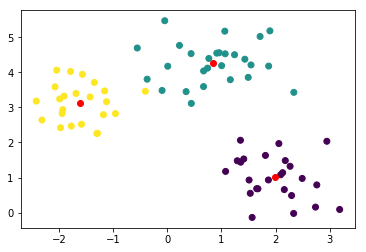

In [141]:
print(model.cluster_centers_)

plt.scatter(X[:, 0], X[:, 1], c=y_pred);
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='red')

## Citations

This Jupyter notebook was compiled using the following resources:
- [https://github.com/susanli2016/Machine-Learning-with-Python](https://github.com/susanli2016/Machine-Learning-with-Python)
- [https://github.com/chalmerlowe/machine_learning](https://github.com/chalmerlowe/machine_learning)
- [https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)